<IPython.core.display.Javascript object>


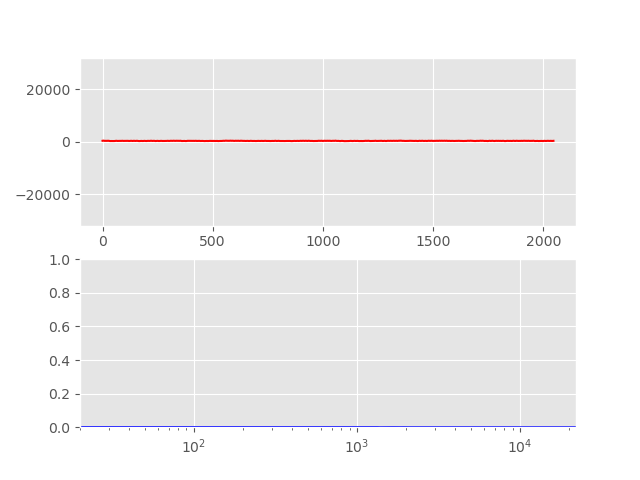

In [ ]:
import numpy as np 
import pyaudio as pa 
import struct 
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')
%matplotlib notebook

CHUNK = 1024 * 1
FORMAT = pa.paInt16
CHANNELS = 1
RATE = 44100 # in Hz

p = pa.PyAudio()

stream = p.open(
    format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)



fig, (ax,ax1) = plt.subplots(2)
x_fft = np.linspace(0, RATE, CHUNK)
x = np.arange(0,2*CHUNK,2)
line, = ax.plot(x, np.random.rand(CHUNK),'r')
line_fft, = ax1.semilogx(x_fft, np.random.rand(CHUNK), 'b')
ax.set_ylim(-32000,32000)
ax.ser_xlim = (0,CHUNK)
ax1.set_xlim(20,RATE/2)
ax1.set_ylim(0,1)
fig.show()

while 1:
    data = stream.read(CHUNK)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    line.set_ydata(dataInt)
    line_fft.set_ydata(np.abs(np.fft.fft(dataInt))*2/(11000*CHUNK))
    fig.canvas.draw()
    fig.canvas.flush_events()